# 互评作业三：基于 K-means 的文本聚类

### 姓名：刘思雯      学号：3120220948

#### 1.数据预处理

In [1]:
# 导入相关库
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score,calinski_harabasz_score
import numpy as np
import re
import string
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import fetch_20newsgroups
from sklearn.model_selection import train_test_split
from sklearn.manifold import TSNE
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
# 使用20 newsgroups数据集
dataset = fetch_20newsgroups(download_if_missing=True, remove=('headers','footers','quotes'))
# 可以看到，数据集一共有20个分类
dataset.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

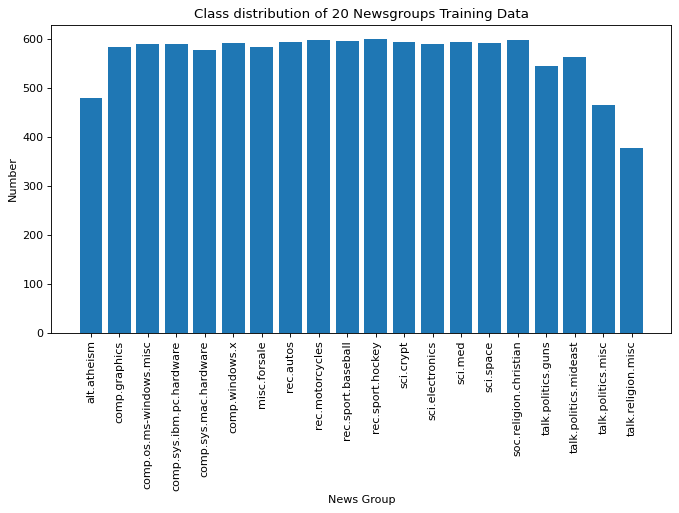

In [3]:
# 对各类别的数量进行可视化
targets, frequency = np.unique(dataset.target, return_counts=True)
targets_str = np.array(dataset.target_names)
fig = plt.figure(figsize=(10,5), dpi=80, facecolor='w', edgecolor='k')
plt.bar(targets_str, frequency)
plt.xticks(rotation=90)
plt.title('Class distribution of 20 Newsgroups Training Data')
plt.xlabel('News Group')
plt.ylabel('Number')
plt.show()

In [4]:
# 去除数字，符号，并把大写字母转换成小写
dataset_df = pd.DataFrame({'data': dataset.data, 'target':dataset.target})
def alphanumeric(x):
    return re.sub(r"""\w*\d\w*""", ' ', x)
def punc_lower(x):
    return re.sub('[%s]'% re.escape(string.punctuation), ' ', x.lower())
dataset_df['data'] = dataset_df.data.map(alphanumeric).map(punc_lower)
# 处理后的数据
dataset_df.data

0        i was wondering if anyone out there could enli...
1        a fair number of brave souls who upgraded thei...
2        well folks  my mac plus finally gave up the gh...
3        \ndo you have weitek s address phone number   ...
4        from article      world std com   by tombaker ...
                               ...                        
11309    dn  from  nyeda cnsvax uwec edu  david nye \nd...
11310    i have a  very old  mac   and a mac plus  both...
11311    i just installed a     cpu in a clone motherbo...
11312    \nwouldn t this require a hyper sphere   in   ...
11313    stolen from pasadena between     and     pm on...
Name: data, Length: 11314, dtype: object

#### 2.使用K-means聚类

In [5]:
texts = dataset.data
target = dataset.target
# 使用TF-IDF将文本向量化，同时去掉停用词
vectorizer = TfidfVectorizer(stop_words='english')
x = vectorizer.fit_transform(texts)
X_train,X_test,y_train,y_test = train_test_split(x,target,test_size=0.33,random_state=1)

In [6]:
# 数据集有20个类
number_of_clusters = 20
model = KMeans(n_clusters=number_of_clusters,
              init='k-means++',
              max_iter=100,
              n_init=1)
yplabel=model.fit_predict(x)
print(yplabel)

[ 1  6  6 ... 17  2 17]


#### 3.使用轮廓系数、CH指数进行评估

In [7]:
labels = model.predict(X_test)
print(y_test, labels)
# 轮廓系数取值范围为[-1,1],同类别样本距离越相近，不同类别样本距离越远，分数越高。
silhouette_scores = silhouette_score(y_test.reshape(-1, 1),np.ravel(labels))
print(silhouette_scores)
# CH指数本质是簇间距离与簇内距离的比值，分数越大越好
calinski_score = calinski_harabasz_score(y_test.reshape(-1, 1), np.ravel(labels))
print(calinski_score)

[ 8 19 15 ...  0  7 10] [16 18 11 ... 11 17  4]
-0.519872688126153
90.38757961635515


#### 4.可视化

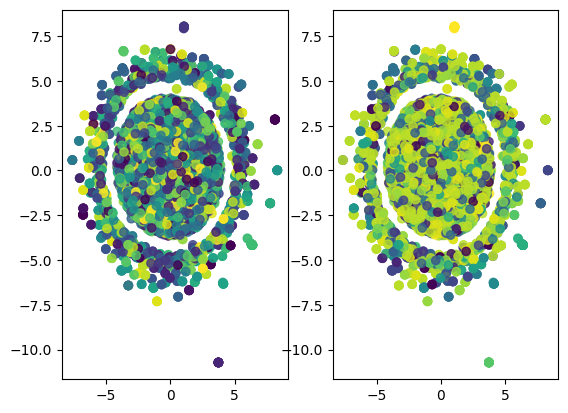

In [8]:
# 用TSNE进行数据降维并展示聚类结果

#定义T-sne函数
def tsne(data,n):
    # ignore all future warnings
    tsne=TSNE(random_state=42,perplexity=n)
    digits_tsne=tsne.fit_transform(data)
    return digits_tsne
 
# #实现T-sne降维与数据可视化
tsne_data = tsne(x,15)
fig, ax = plt.subplots(nrows=1, ncols=2)
ax1 = ax[0]
ax2 = ax[1]
# 数据集标注
ax1.scatter(tsne_data[:,0],tsne_data[:,1],alpha=0.8,c=target)
# 预测结果
ax2.scatter(tsne_data[:,0],tsne_data[:,1],alpha=0.8,c=yplabel)
plt.show()

该数据集降维后的聚类可视化没有显示出很好的结果。